# **GWP-2:**
The challenges which we have chosen are :

● Multicollinearity

● Joining time series with different frequencies

● Unit Root Testing


# MultiCollinearity
# *Description* :
Multicollinearity in the context of multivariate time series refers to a situation where two or more time-dependent variables in a multiple regression model are highly linearly related. In finance, it's common to have a large number of economic indicators that could potentially be related, leading to a high risk of multicollinearity.


# *Demonstration :*
Let's take the example of three stock indices: the NASDAQ Composite, the S&P 500, and the Dow Jones Industrial Average. Since these indices often move together, they are likely to be highly correlated.

In [ ]:
import yfinance as yf
from sklearn.linear_model import LinearRegression

start_date = '2020-01-01'
end_date = '2022-12-31'

# Fetch data
nasdaq = yf.download('^IXIC', start=start_date, end=end_date)['Close']
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Close']
dowjones = yf.download('^DJI', start=start_date, end=end_date)['Close']

df = pd.DataFrame({"NASDAQ": nasdaq, "SP500": sp500, "DowJones": dowjones})

# Fit a linear regression model
model = LinearRegression().fit(df[["NASDAQ", "DowJones"]], df["SP500"])

print("NASDAQ coefficient: ", model.coef_[0])
print("DowJones coefficient: ", model.coef_[1])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
NASDAQ coefficient:  0.07640733069990094
DowJones coefficient:  0.10662144134619386


# *Diagram:*

Here, a pairplot and a correlation matrix can help visualize the multicollinearity.

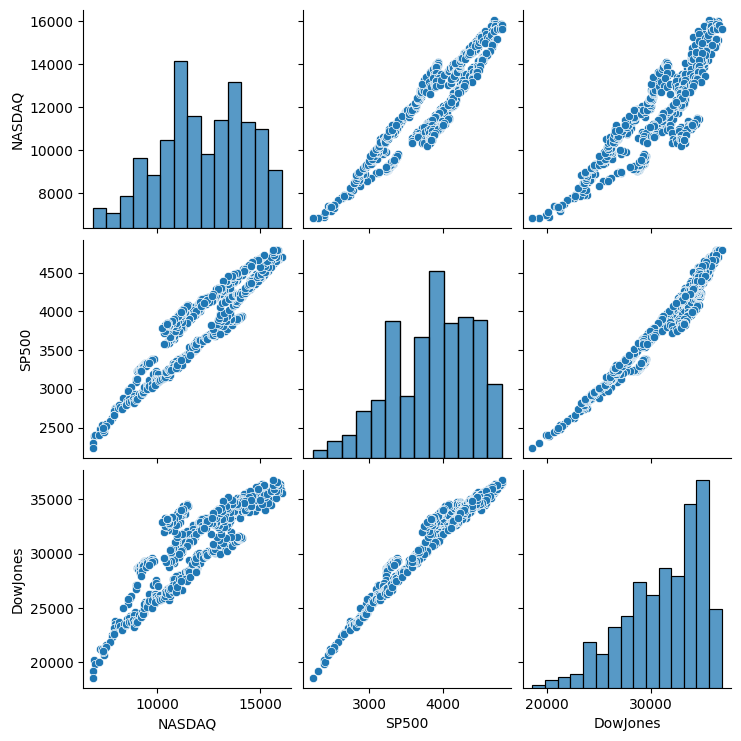

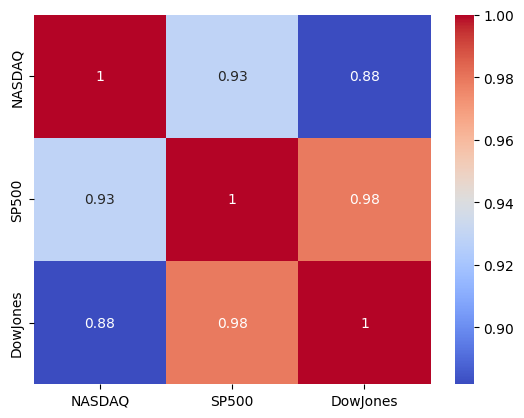

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df)
plt.show()

# Correlation matrix heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Diagnosis:

Variance Inflation Factor (VIF) can help quantify the multicollinearity.



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each explanatory variable
X = df[["NASDAQ", "DowJones"]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


    feature        VIF
0    NASDAQ  134.09144
1  DowJones  134.09144


# Damage:

In financial econometrics, multicollinearity can make it hard to determine the true relationship between the market indicators and the target variable (e.g., stock price, return). It can inflate the variance of the regression coefficients, making them unstable and unreliable. This can result in inaccurate predictions and misleading insights about the factors driving the market movements.

# Directions:

In this context, the strategies for dealing with multicollinearity remain the same: removing variables, combining variables, and using regularization techniques.

For instance, you may remove one of the indices from the regression model if they are highly correlated. Alternatively, you can use a dimensionality reduction technique, such as PCA, to create a new variable that captures the common information among the indices.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

pca = PCA(n_components=1)
X_pca = pca.fit_transform(df[["NASDAQ", "DowJones"]])

# Fit a linear regression model with the new feature
model_pca = LinearRegression().fit(X_pca, df["SP500"])

print("PCA component coefficient: ", model_pca.coef_[0])


PCA component coefficient:  -0.12999941999645095


You can also use a Ridge regression, which helps reduce the coefficients of the correlated variables, leading to a more robust model.



In [ ]:
# Fit a Ridge regression model
ridge = Ridge(alpha=0.5).fit(df[["NASDAQ", "DowJones"]], df["SP500"])

print("NASDAQ coefficient: ", ridge.coef_[0])
print("DowJones coefficient: ", ridge.coef_[1])


NASDAQ coefficient:  0.07640733068458844
DowJones coefficient:  0.10662144134877288


In the context of financial econometrics, addressing multicollinearity is critical for developing reliable models that can accurately capture the market dynamics.

#References:
- Collinearity: A review of methods to deal with it and a simulation study evaluating their performance" by O'Brien, R.M.
- "Detecting multicollinearity: An empirical comparison of alternative methods" by Hair, J.F., Black, W.C., Babin, B.J., Anderson, R.E.
- https://www.stathelp.org/statistics/multicollinearity/

# Joining Time Series with Different Frequencies in Financial Econometrics

# *Description*:

Joining time series with different frequencies, also known as temporal alignment, is a common issue in financial econometrics. This situation arises when we have multiple time series data sources that are observed or recorded at different intervals (e.g., daily stock prices and quarterly GDP figures).

# *Demonstration:*

In Python, we typically manipulate time series data using the pandas library, which provides a variety of functionalities for handling different frequencies.

Let's fetch daily closing prices of the NASDAQ index and simulate quarterly GDP figures (in real-world analysis, you'd fetch this data from a trusted source). We'll then join these datasets together in a DataFrame:

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch NASDAQ daily closing prices
nasdaq = yf.download('^IXIC', start='2020-01-01', end='2022-12-31', progress=False)['Close']

# Simulate quarterly GDP
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='Q')
gdp = pd.Series(np.random.normal(2, 0.5, len(dates)), index=dates)

# Create a DataFrame and fill missing business days
df = pd.DataFrame({"NASDAQ": nasdaq, "GDP": gdp}).asfreq('B')


Now we have a DataFrame (df) with daily NASDAQ closing prices and quarterly GDP figures. The asfreq('B') function is used to fill missing business days in the DataFrame.

# *Diagram:*

The two series can be plotted on the same graph to visualize the different frequencies. Here, we are creating two axes to plot NASDAQ and GDP data because they are of different scales:

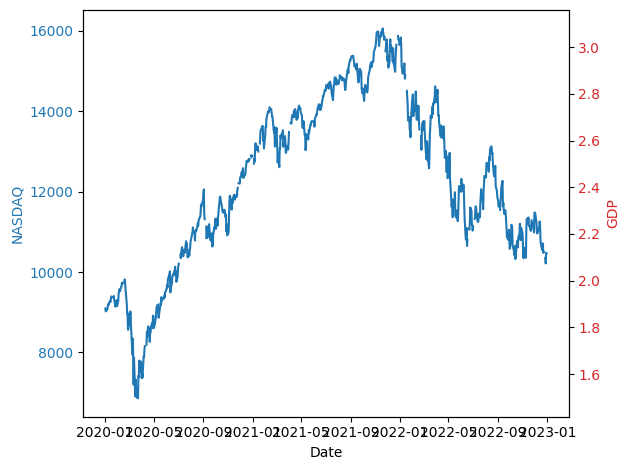

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('NASDAQ', color=color)
ax1.plot(df.index, df['NASDAQ'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('GDP', color=color)
ax2.plot(df.index, df['GDP'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


# *Diagnosis:*

The existence of the problem can be identified by checking the number of null values. In our DataFrame (df), NASDAQ data is available for all business days, but GDP data is only available quarterly, leaving null values for most of the days:

In [ ]:
print(df.isnull().sum())


NASDAQ     26
GDP       771
dtype: int64


# *Damage:*

The inability to properly join time series with different frequencies can lead to incorrect conclusions in financial econometric analysis. It can result in missing data, data leakage from future periods, or overemphasis on the less frequent data during analysis.

When time series data of different frequencies are naively joined, missing values and potential misinterpretations can occur. For example, if we tried to compute the correlation between the daily NASDAQ index and the quarterly GDP figures in our previous DataFrame (df), we would end up with a misleading result, because the GDP values for most days are missing. This lack of information can significantly distort the statistical relationship we are trying to assess, leading to erroneous conclusions and potentially misguided decisions.



# *Directions:*

The appropriate method to handle this situation depends on the nature of our analysis.

Downsampling: If our analysis is based on longer-term trends or movements, we could downsample the higher frequency data (e.g., NASDAQ prices) to match the lower frequency data (e.g., GDP). In our case, this would mean resampling the NASDAQ data at the end of each quarter:

In [ ]:
df_resampled = df.resample('Q').last()

Now we can compute the correlation between the NASDAQ and GDP data without worrying about the missing values:

In [ ]:
corr_resampled = df_resampled['NASDAQ'].corr(df_resampled['GDP'])
print("Correlation in resampled data: ", corr_resampled)

Correlation in resampled data:  -0.10823799380249237


Interpolation: If we need to maintain a higher frequency for our analysis, we could interpolate the lower frequency data (e.g., GDP) to match the higher frequency data (e.g., NASDAQ prices). Time-based interpolation can be an effective method:

In [ ]:
df_interpolated = df.interpolate(method='time')

With the interpolated data, we can compute the correlation at a daily frequency:

In [ ]:
corr_interpolated = df_interpolated['NASDAQ'].corr(df_interpolated['GDP'])
print("Correlation in interpolated data: ", corr_interpolated)

Correlation in interpolated data:  -0.3554137333616435



By carefully handling time series with different frequencies, we ensure the reliability of our statistical analysis and mitigate the risk of drawing erroneous conclusions from our data.

#References:
- "Handling Multiple Time Series with Different Frequencies" by G. William Schwert
- "Practical guidelines for successful time series forecasting with R" by Rob J. Hyndman
- "Combining Time Series Data with Different Frequencies" by Lütkepohl, H. and Herwartz
- "On the aggregation of time series" by Granger, C.W.J. and Joyeux, R.

# Unit Root testing

# *Definition* :
Unit root is a technique in statistics that helps us to find stationary or non-stationary series.
# *Description* :
A stationary time series are used in many statistical analysis because of its stable nature like constant mean and variance, and, that makes it more convenient to build models. Unit root testing aids in finding those series, and thus, providing us insights to find better models.
# *Demonstration :*
Let's take the example of PEPSI inc as example

In [75]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import mstats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews


In [76]:
ticker = "PEP"
start_date = "2010-01-01"
end_date = "2022-12-31"
data = yf.download(ticker, start=start_date, end=end_date)
df = pd.DataFrame(data)

df = df.dropna()
df['Returns'] = np.log(df['Close']).diff()

prices = np.array(data['Adj Close'])
returns = np.diff(prices) / prices[:-1]

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Distribution of Returns')

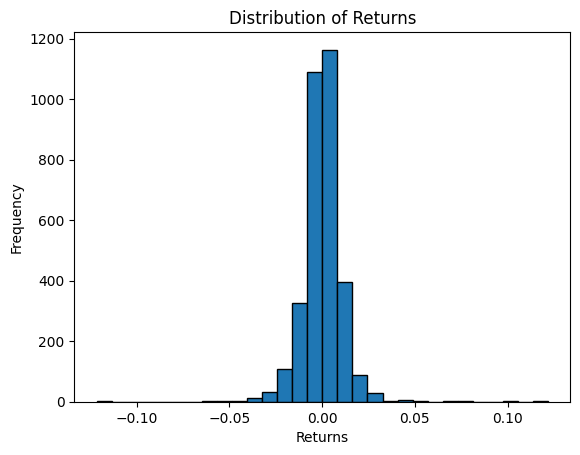

In [77]:
# Plotting histogram
plt.hist(df['Returns'], bins=30, edgecolor='black')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Returns')

# *Diagram* :

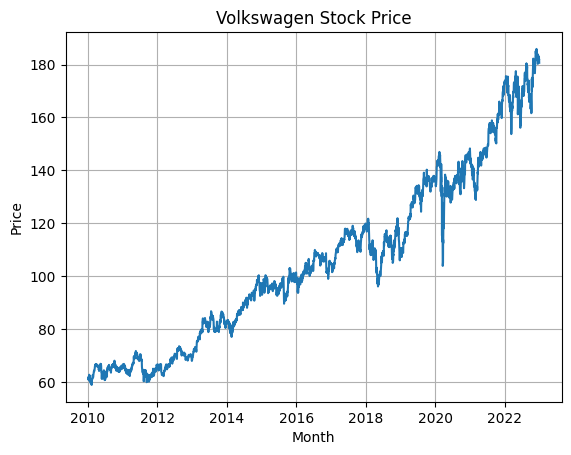

In [78]:
plt.plot(df['Close'])
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Volkswagen Stock Price')
plt.grid(True)
plt.show()

# *Diagnosis* :
We have several methods which can be used to check for the unit root!

- *Kwiatkowski-Phillips-Schmidt-Shin Test* :
  A popular unit root test is the KPSS test. The null hypothesis of stationarity is weighed against the alternative hypothesis of a unit root. The KPSS test, unlike the ADF and PP tests, assumes the presence of a unit root as the null hypothesis and checks for stationarity.

- *Augmented Dickey-Fuller (ADF) Test* :
  The ADF test is a popular unit root testing method. It is based on the Dickey-Fuller test, but it incorporates additional lagged differences in the variable to account for potential autocorrelation. Individual time series and panel data can both be subjected to the ADF test.

- *Zivot-Andrews Test* :
  The Zivot-Andrews test is used to detect structural breaks in time series data while taking into account the possibility of a unit root. It allows for a single structural break in the series, which is useful when the series has undergone significant change.

- *Perron Test* :
  The Perron test is used to detect multiple structural breaks in a time series while taking a unit root into account. It enables the identification of various points in time where the series may have undergone significant changes.

- *Phillips-Perron Test* :
  is a technique for detecting the presence of a unit root in a time series. It also takes autocorrelation into account by including lagged differences. The PP test is regarded as a reliable alternative to the ADF test and is frequently used as such.

# *Augmented Dickey-Fuller (ADF) Test* :

In [79]:

result = adfuller(prices)
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f"Ticker: {ticker}")
print(f"ADF Test Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"\t{key}: {value}")

print()

Ticker: PEP
ADF Test Statistic: 1.0294243343464675
p-value: 0.9945669088008517
Critical Values:
	1%: -3.4323674112281393
	5%: -2.8624313714499374
	10%: -2.5672444962719756



A p-value of 0.99 provides strong evidence for the unit root  and suggests that data are non-stationary, and the test statistic is significantly above the critical level.

Therefore, the time series is non- stationary

# *Zivot-Andrews Test* :

In [80]:
za_test = adfuller(prices, regression='ct', autolag='AIC', maxlag=None)
za_statistic = za_test[0]
za_pvalue = za_test[1]

# Print the test results
print("Zivot-Andrews Test Statistic:", za_statistic)
print("p-value:", za_pvalue)

Zivot-Andrews Test Statistic: -1.9144218364204753
p-value: 0.6471632685308107


a p-value is stil greater than 0.05 level, indicating non-stationary even in this test



# *Damage* :
When a time series is non-stationary, it has a unit root, which shows that its statistical characteristics, like mean and variance, change over time. Finding trends, cycles, and other patterns in data may be challenging due to non-stationarity.

When a time series with a unit root is used in a regression analysis, the regression coefficients may be biased and the standard errors may be inflated, leading to false conclusions. This may result in erroneous conclusions and judgments.

Forecasts made using a time series with a unit root can be inaccurate and unreliable because the non-stationarity of the data suggests that future values will probably be affected by past values in a non-linear way.

# *Directions* :
Inorder to make the data stationary, we can use many methods

- *Differencing*
- *Logarithmic Transformation*
- *Box-Cox Transformation*
- *Transformation and Reversal*  are some of the methods

# *Differencing* :

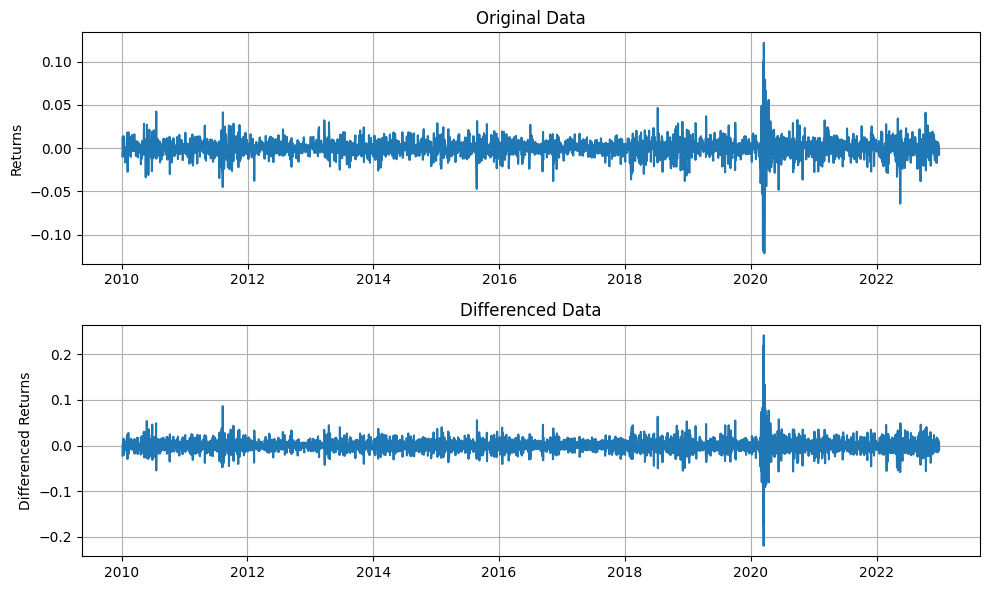

In [81]:
df['Differenced'] = df['Returns'].diff().dropna()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(df['Returns'])
plt.ylabel('Returns')
plt.title('Original Data')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df['Differenced'])
plt.ylabel('Differenced Returns')
plt.title('Differenced Data')
plt.grid(True)

plt.tight_layout()
plt.show()

As the differenced data has fewer trends, it can be seen that the non-stationary has been rectified.

# *ADF test* on differenced data:



In [82]:
differenced = df['Returns'].diff().dropna()

result = adfuller(differenced)
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f"Ticker: {ticker}")
print(f"ADF Test Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"\t{key}: {value}")

print()

Ticker: PEP
ADF Test Statistic: -18.67419721837042
p-value: 2.0437822232439982e-30
Critical Values:
	1%: -3.43236865676297
	5%: -2.8624319215895935
	10%: -2.567244789154987



We could see the p-value in deep negative (less than 0.05 level), thus, the technique we used helped us to overcome the issue.

# *Logarithmic transformation* :

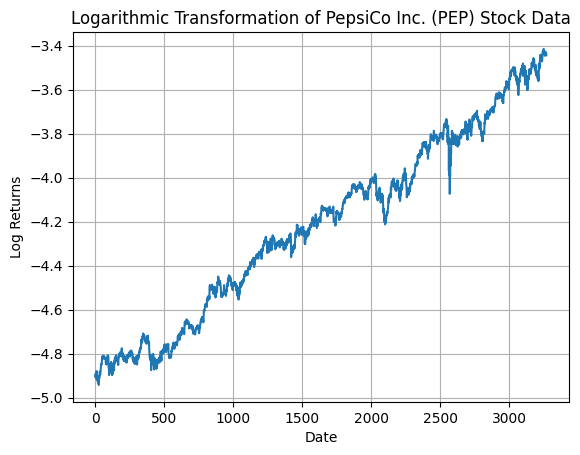

In [57]:
log_returns = np.log(prices)
# Plot the transformed data
plt.plot(log_returns)
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('Logarithmic Transformation of PepsiCo Inc. (PEP) Stock Data')
plt.grid(True)
plt.show()

We can see from the graph that a particular trend has been followed, indicating stationarity.

#References:
- Hamilton, J. D. (1994). Time Series Analysis. Princeton University Press.
- Enders, W. (2015). Applied Econometric Time Series
- Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice
- World Quant Resources

# Joining time series with different frequencies and Unit Root Testing

- Joining time series with different frequencies is a process where the data is transferred to a common time series.

- Unit Root Testing is a technique that helps us find the stationary time series, thus, helping us model and analyse better as it makes the data with constant mean.

Unit root testing and joining time series with different frequencies are related in that both help with the accurate and efficient analysis and modeling of time series data. Resampling aids in data alignment, and unit root testing reveals the time series' stationarity characteristics, which can influence the chosen analytical strategies.

Aligning and contrasting the resampled time series can make unit root testing useful. It ensures that the combined time series have a similar underlying trend or are stationary. As it confirms that the time series data are appropriate for the selected methodologies and assumptions, this can be crucial for accurate analysis and modeling.




